In [18]:
import pandas as pd

# Memuat dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Melihat nama kolom
print("Nama Kolom:")
print(data.columns)

# Melihat beberapa baris pertama
print("\nBeberapa Baris Pertama:")
print(data.head())

# Melihat tipe data setiap kolom
print("\nTipe Data Setiap Kolom:")
print(data.dtypes)

# Melihat label unik dari kolom 'stroke'
print("\nLabel Unik dari Kolom 'stroke':")
print(data['stroke'].unique())

# Menampilkan nilai unik dari kolom target
print("\nNilai Unik dari Kolom 'stroke':")
print(data['stroke'].unique())

# Menampilkan urutan kolom yang digunakan dalam model
feature_columns = ['avg_glucose_level', 'Residence_type', 'ever_married', 'bmi', 'age', 'gender', 'smoking_status', 'work_type', 'heart_disease', 'hypertension']
print("\nUrutan Kolom untuk Prediksi:")
print(feature_columns)



Nama Kolom:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Beberapa Baris Pertama:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban            

'id' telah dihapus dari dataset.
Jumlah total data asli: 4909
Jumlah data setelah penyeimbangan: 9400


<ipython-input-16-2e6c6db47a06>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_combined['heart_disease'] = X_balanced['heart_disease']


Jumlah data latih: 6580
Jumlah data uji: 2820
Akurasi Model: 94.72%
Confusion Matrix:
[[1317   90]
 [  59 1354]]


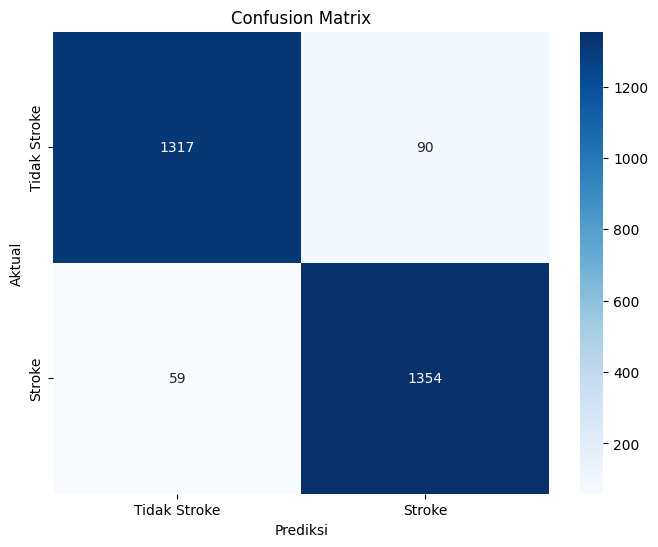

Classification Report:
              precision    recall  f1-score   support

Tidak Stroke       0.96      0.94      0.95      1407
      Stroke       0.94      0.96      0.95      1413

    accuracy                           0.95      2820
   macro avg       0.95      0.95      0.95      2820
weighted avg       0.95      0.95      0.95      2820



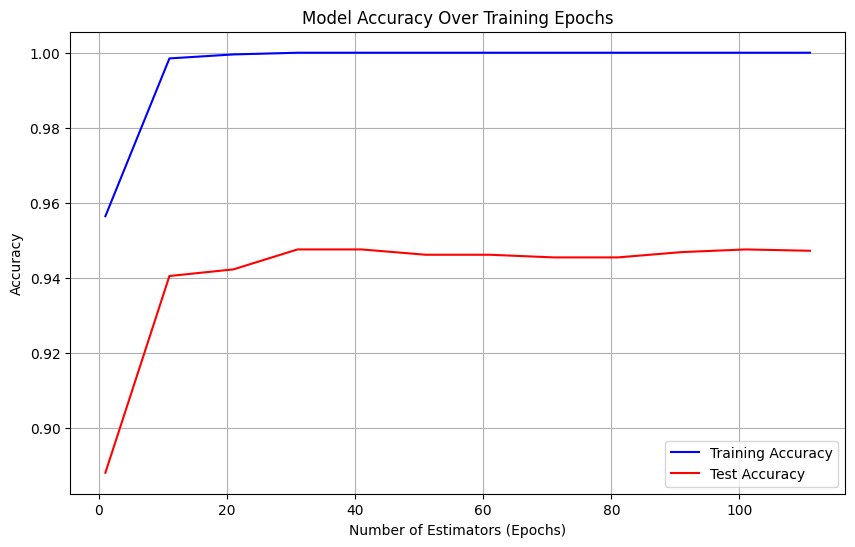

Fitur yang Terpilih:
['work_type', 'gender', 'smoking_status', 'age', 'ever_married', 'bmi', 'Residence_type', 'avg_glucose_level', 'heart_disease', 'hypertension']
Fitur yang Dipilih dari Metode Filter:
Index(['gender', 'age', 'ever_married', 'Residence_type', 'avg_glucose_level'], dtype='object')
Fitur yang Dipilih dari Metode Wrapper:
Index(['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status'], dtype='object')
Fitur yang Digabungkan:
['work_type', 'gender', 'smoking_status', 'age', 'ever_married', 'bmi', 'Residence_type', 'avg_glucose_level', 'heart_disease', 'hypertension']


In [16]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore', category=FutureWarning)


file_path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Tangani nilai yang hilang (jika ada)
data.dropna(inplace=True)

# Hapus atribut 'id'
if 'id' in data.columns:
    data.drop(columns=['id'], inplace=True)
    print("'id' telah dihapus dari dataset.")

# Tampilkan jumlah total data
print(f"Jumlah total data asli: {len(data)}")

# Encode variabel kategorikal
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Pisahkan fitur dan target
X = data.drop(columns=['stroke'])  # Asumsikan 'stroke' adalah kolom target
y = data['stroke']

# Menangani ketidakseimbangan data dengan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Tampilkan jumlah data setelah SMOTE
print(f"Jumlah data setelah penyeimbangan: {len(X_balanced)}")

# Normalisasi fitur (diperlukan untuk metode chi2)
scaler = MinMaxScaler()
X_balanced_normalized = scaler.fit_transform(X_balanced)

# Seleksi Fitur menggunakan Metode Filter
filter_selector = SelectKBest(score_func=chi2, k=5)  # Pilih 5 fitur terbaik
X_filtered_selected = filter_selector.fit_transform(X_balanced_normalized, y_balanced)
filter_support = filter_selector.get_support()
filter_selected_features = X.columns[filter_support]

# Seleksi Fitur menggunakan Metode Wrapper
wrapper_selector = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=5)
X_wrapper_selected = wrapper_selector.fit_transform(X_balanced_normalized, y_balanced)
wrapper_support = wrapper_selector.support_
wrapper_selected_features = X.columns[wrapper_support]

# Gabungkan Fitur yang Dipilih dari Metode Filter dan Wrapper
combined_features = list(set(filter_selected_features).union(wrapper_selected_features))
X_combined = X_balanced[combined_features]

# Pastikan 'heart_disease' dan 'hypertension' termasuk dalam fitur yang dipilih
if 'heart_disease' not in combined_features:
    combined_features.append('heart_disease')
    X_combined['heart_disease'] = X_balanced['heart_disease']
if 'hypertension' not in combined_features:
    combined_features.append('hypertension')
    X_combined['hypertension'] = X_balanced['hypertension']

# Bagi data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_balanced, test_size=0.3, random_state=42)

# Tampilkan jumlah data latih dan uji
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

# Latih Random Forest Classifier dengan jumlah estimator akhir
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Evaluasi model
accuracy = rf_model.score(X_test, y_test)

print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Confusion Matrix
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Stroke', 'Stroke'], yticklabels=['Tidak Stroke', 'Stroke'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Tidak Stroke', 'Stroke'], zero_division=1)
print("Classification Report:")
print(class_report)

# Visualisasi akurasi model pada jumlah estimator yang berbeda
train_accuracies = []
test_accuracies = []
estimators_range = range(1, 121, 10)  # Jumlah estimator dari 1 hingga 120 dengan interval 10

for n_estimators in estimators_range:
    temp_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42, class_weight='balanced')
    temp_model.fit(X_train, y_train)
    train_accuracies.append(temp_model.score(X_train, y_train))
    test_accuracies.append(temp_model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_accuracies, label='Training Accuracy', color='blue')
plt.plot(estimators_range, test_accuracies, label='Test Accuracy', color='red')
plt.xlabel('Number of Estimators (Epochs)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Training Epochs')
plt.legend()
plt.grid()
plt.show()

# Output fitur yang terpilih
print("Fitur yang Terpilih:")
print(combined_features)

print("Fitur yang Dipilih dari Metode Filter:")
print(filter_selected_features)

print("Fitur yang Dipilih dari Metode Wrapper:")
print(wrapper_selected_features)

print("Fitur yang Digabungkan:")
print(combined_features)


In [17]:
import joblib

# Simpan model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Simpan label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

# Simpan scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [2]:
# Langkah 1: Mengunggah file model dan label encoders
from google.colab import files
uploaded_files = files.upload()

# Langkah 2: Mengimpor library yang diperlukan
import pandas as pd
import joblib
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Langkah 3: Memuat model dan label encoders
model = joblib.load('random_forest_model.pkl')  # Ganti dengan nama file model Anda jika berbeda
label_encoders = joblib.load('label_encoders.pkl')  # Ganti dengan nama file label encoders Anda jika berbeda

# Langkah 4: Membuat antarmuka input menggunakan Google Colab
def predict_stroke(button):
    clear_output(wait=True)
    display(work_type_widget)
    display(gender_widget)
    display(smoking_status_widget)
    display(age_widget)
    display(ever_married_widget)
    display(bmi_widget)
    display(residence_type_widget)
    display(avg_glucose_level_widget)
    display(heart_disease_widget)
    display(hypertension_widget)
    display(predict_button)

    input_data = pd.DataFrame({
        'work_type': [work_type_widget.value],
        'gender': [gender_widget.value],
        'smoking_status': [smoking_status_widget.value],
        'age': [age_widget.value],
        'ever_married': [ever_married_widget.value],
        'bmi': [bmi_widget.value],
        'Residence_type': [residence_type_widget.value],
        'avg_glucose_level': [avg_glucose_level_widget.value],
        'heart_disease': [1 if heart_disease_widget.value == "Yes" else 0],
        'hypertension': [1 if hypertension_widget.value == "Yes" else 0]
    })

    # Mengencode fitur kategorikal menggunakan label encoders
    for column in ['work_type', 'gender', 'smoking_status', 'ever_married', 'Residence_type']:
        input_data[column] = label_encoders[column].transform(input_data[column])

    # Menampilkan data input
    print("Data yang dimasukkan:")
    print(input_data)

    # Prediksi
    prediction = model.predict(input_data)
    probabilities = model.predict_proba(input_data)

    # Menampilkan hasil prediksi dan probabilitas
    if prediction[0] == 1:
        print("Prediksi: Risiko Stroke Tinggi")
    else:
        print("Prediksi: Risiko Stroke Rendah")

    print(f"Probabilitas Risiko Stroke Rendah (Class 0): {probabilities[0][0]:.2f}")
    print(f"Probabilitas Risiko Stroke Tinggi (Class 1): {probabilities[0][1]:.2f}")

# Widget untuk input data
work_type_widget = widgets.Dropdown(
    options=["Private", "Self-employed", "Govt_job", "children", "Never_worked"],
    description="Jenis Pekerjaan:",
    value="Private"
)

gender_widget = widgets.Dropdown(
    options=["Male", "Female"],
    description="Jenis Kelamin:",
    value="Male"
)

smoking_status_widget = widgets.Dropdown(
    options=["never smoked", "smokes", "formerly smoked"],
    description="Status Merokok:",
    value="never smoked"
)

age_widget = widgets.IntSlider(
    min=0,
    max=120,
    step=1,
    value=30,
    description="Usia:"
)

ever_married_widget = widgets.Dropdown(
    options=["Yes", "No"],
    description="Status Pernikahan:",
    value="Yes"
)

bmi_widget = widgets.FloatSlider(
    min=0.0,
    max=100.0,
    step=0.1,
    value=22.0,
    description="BMI:"
)

residence_type_widget = widgets.Dropdown(
    options=["Urban", "Rural"],
    description="Tipe Tempat Tinggal:",
    value="Urban"
)

avg_glucose_level_widget = widgets.FloatSlider(
    min=0.0,
    max=300.0,
    step=0.1,
    value=85.0,
    description="Rata-rata Tingkat Glukosa:"
)

heart_disease_widget = widgets.Dropdown(
    options=["Yes", "No"],
    description="Riwayat Penyakit Jantung:",
    value="No"
)

hypertension_widget = widgets.Dropdown(
    options=["Yes", "No"],
    description="Tekanan Darah Tinggi:",
    value="No"
)

predict_button = widgets.Button(description="Prediksi Stroke")

# Menghubungkan tombol dengan fungsi prediksi
predict_button.on_click(predict_stroke)

# Menampilkan widget
display(work_type_widget)
display(gender_widget)
display(smoking_status_widget)
display(age_widget)
display(ever_married_widget)
display(bmi_widget)
display(residence_type_widget)
display(avg_glucose_level_widget)
display(heart_disease_widget)
display(hypertension_widget)
display(predict_button)


Dropdown(description='Jenis Pekerjaan:', options=('Private', 'Self-employed', 'Govt_job', 'children', 'Never_w…

Dropdown(description='Jenis Kelamin:', options=('Male', 'Female'), value='Male')

Dropdown(description='Status Merokok:', index=1, options=('never smoked', 'smokes', 'formerly smoked'), value=…

IntSlider(value=68, description='Usia:', max=120)

Dropdown(description='Status Pernikahan:', options=('Yes', 'No'), value='Yes')

FloatSlider(value=97.6, description='BMI:')

Dropdown(description='Tipe Tempat Tinggal:', options=('Urban', 'Rural'), value='Urban')

FloatSlider(value=243.8, description='Rata-rata Tingkat Glukosa:', max=300.0)

Dropdown(description='Riwayat Penyakit Jantung:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Tekanan Darah Tinggi:', options=('Yes', 'No'), value='Yes')

Button(description='Prediksi Stroke', style=ButtonStyle())

Data yang dimasukkan:
   work_type  gender  smoking_status  age  ever_married   bmi  Residence_type  \
0          2       1               3   68             1  97.6               1   

   avg_glucose_level  heart_disease  hypertension  
0              243.8              1             1  
Prediksi: Risiko Stroke Tinggi
Probabilitas Risiko Stroke Rendah (Class 0): 0.46
Probabilitas Risiko Stroke Tinggi (Class 1): 0.55
